In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [9]:
#Capital punishment pre 1974
csv_file_pre = "pre_1974_encoded.csv"
df_pre = pd.read_csv(csv_file_pre, dtype=int)
#df_pre = df_pre.drop("Unnamed: 0", axis=1)
df_pre.head()

,Race,Execution Method,State,Sex,Year,Month,Day,Crimes Committed
0,1,1,1,1,1812,12,19,1
1,1,4,1,1,1814,2,6,44
2,2,1,1,1,1820,5,19,13
3,2,1,1,1,1820,5,19,1
4,2,1,1,1,1822,5,30,1


In [10]:
#Capital punishment post 1974
csv_file_post = "post_1974_encoded.csv"
df_post = pd.read_csv(csv_file_post, dtype=int)
#df_post = df_post.drop("Unnamed: 0", axis=1)
df_post.head()

,Race,Execution Method,State,Sex,Year,Month,Day,Crimes Committed
0,1,4,49,1,1977,1,17,1
1,1,2,12,1,1979,5,25,1
2,1,3,32,1,1979,10,22,1
3,1,2,18,1,1981,3,9,1
4,1,2,51,1,1982,8,10,1


In [16]:
y_train = df_pre['Race']
y_test = df_post['Race']

In [17]:
#X = df.drop("Outcome", axis=1)

X_train = df_pre.drop("Race", axis=1)
X_test = df_post.drop("Race", axis=1)

In [18]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    


k: 1, Train/Test Score: 0.983/0.426
k: 3, Train/Test Score: 0.810/0.474
k: 5, Train/Test Score: 0.757/0.477
k: 7, Train/Test Score: 0.730/0.489
k: 9, Train/Test Score: 0.713/0.505
k: 11, Train/Test Score: 0.698/0.522
k: 13, Train/Test Score: 0.686/0.523
k: 15, Train/Test Score: 0.678/0.529
k: 17, Train/Test Score: 0.675/0.535
k: 19, Train/Test Score: 0.666/0.526


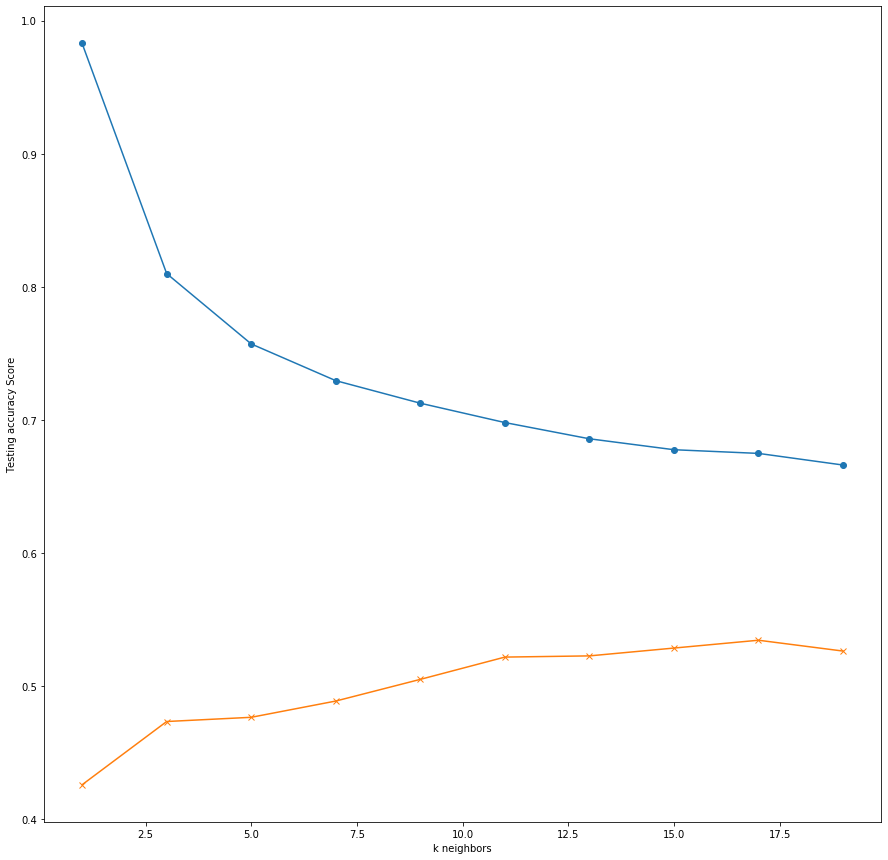

In [19]:

plt.figure(figsize=(15,15))
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [7]:
plt.savefig('CP-KNN-post-post.png')

<Figure size 432x288 with 0 Axes>